In [1]:
import numpy as np
import pandas as pd
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import cv2

2024-12-21 13:50:22.880959: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734799823.002823   15003 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734799823.039840   15003 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-21 13:50:23.203517: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
values, count = np.unique(y_train, return_counts = True)

In [4]:
count

array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000])

In [5]:
def properties(data):
    print(f"The dataset has {data.shape[0]} images.")
    values, count = np.unique(data, return_counts = True)
    for i in zip(values, count):
        print(f"Value {i[0]} has {i[1]} samples")

In [6]:
print(f"labels and values for train data :")
print(f"{properties(y_train)}")

labels and values for train data :
The dataset has 50000 images.
Value 0 has 5000 samples
Value 1 has 5000 samples
Value 2 has 5000 samples
Value 3 has 5000 samples
Value 4 has 5000 samples
Value 5 has 5000 samples
Value 6 has 5000 samples
Value 7 has 5000 samples
Value 8 has 5000 samples
Value 9 has 5000 samples
None


In [7]:
print(f"labels and values for test data :")
print(f"{properties(y_test)}")

labels and values for test data :
The dataset has 10000 images.
Value 0 has 1000 samples
Value 1 has 1000 samples
Value 2 has 1000 samples
Value 3 has 1000 samples
Value 4 has 1000 samples
Value 5 has 1000 samples
Value 6 has 1000 samples
Value 7 has 1000 samples
Value 8 has 1000 samples
Value 9 has 1000 samples
None


In [8]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
labels[0]

'airplane'

In [9]:
lst = []
print(len(lst))

0


In [10]:
def show_images(X, y, labels):
    
    lst = []  # To store unique labels
    plt.figure(figsize=(5, 5))  # Set figure size for the 3x3 grid
    prev = 0
    random_n = np.random.randint(0, 50001)

    for i in range(random_n, y.shape[0]):
        if len(lst) >= 9:  # Display only the first 9 unique labels
            break
        if (y[i, -1] not in lst) and (y[i, -1] == prev):  # Check if the label is new
            plt.subplot(3, 3, prev + 1)  # Correct 3x3 grid position
            plt.imshow(X[i, :])  # Show the image
            plt.title(f"{labels[prev]}")
            plt.axis('off')  # Remove axis ticks
            prev += 1
            lst.append(y[i, -1])  # Add the new label to the list

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Show all images at once

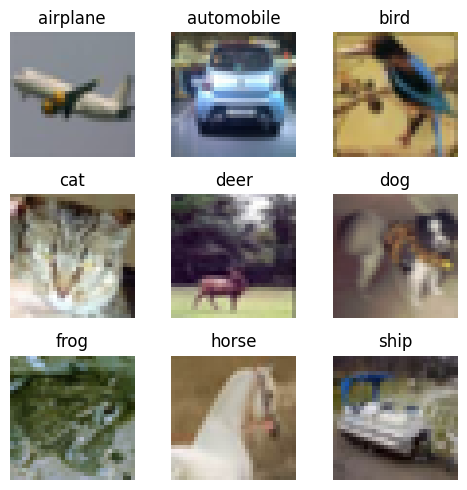

In [11]:
show_images(X_train, y_train, labels)

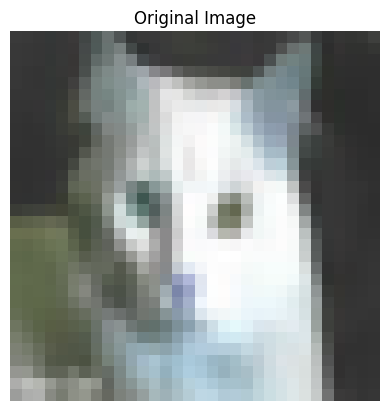

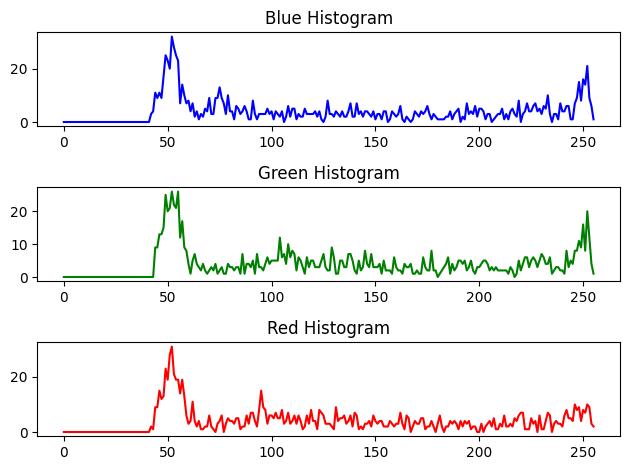

In [12]:
def show_histograms(img : np.ndarray):
    """ 
        Take a image and show its histogram
    """
    plt.axis("off")
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    blue_color = cv2.calcHist([img], [0], None, [256], [0, 256])
    green_color = cv2.calcHist([img], [1], None, [256], [0, 256])
    red_color = cv2.calcHist([img], [2], None, [256], [0, 256])

    # Blue histogram.
    plt.subplot(3, 1, 1)
    plt.title("Blue Histogram")
    plt.plot(blue_color, color = "blue")
    
    # Green histogram.
    plt.subplot(3, 1, 2)
    plt.title("Green Histogram")
    plt.plot(green_color, color = "green")

    # Blue histogram.
    plt.subplot(3, 1, 3)
    plt.title("Red Histogram")
    plt.plot(red_color, color = "red")
    
    # for clear view 
    plt.tight_layout() 
    plt.show()

#np.random.seed(random)
random = np.random.randint(low = 0, high = 59000)
show_histograms(X_train[random, :])

In [14]:
from sklearn.manifold import TSNE
from scipy.stats import skew, kurtosis

In [15]:
def compute_general_components(images):
    """
    Compute the components to apply the TSNE
    """
    std_ = np.zeros(images.shape[0])
    mean_ = np.zeros(images.shape[0])
    skew_ = np.zeros(images.shape[0])
    kurto_ = np.zeros(images.shape[0])
    for count, img in enumerate(images):
        std_[count] = np.std(img)
        mean_[count] = np.mean(img)
        skew_[count] = skew(img.flatten())
        kurto_[count] = kurtosis(img.flatten())

    return std_, mean_, skew_, kurto_

In [16]:
x_train_norm = X_train / 255.0  # Ensure normalization

std_, mean_, skew_, kurto_ = compute_general_components(x_train_norm)

In [17]:
arr_ = np.concatenate((std_.reshape(-1, 1), mean_.reshape(-1, 1), skew_.reshape(-1, 1), kurto_.reshape(-1, 1)), axis = 1)
print(f"The array has {arr_.shape} dimensions.")

The array has (50000, 4) dimensions.


In [18]:
%%time

tsne = TSNE(n_components = 2, learning_rate = "auto", init = "random", perplexity = 45)
x_gen_tsne = tsne.fit_transform(arr_)

CPU times: user 13min 18s, sys: 7.96 s, total: 13min 26s
Wall time: 2min 58s


In [19]:
print(f"The array returned has the shape : {x_gen_tsne.shape}")

The array returned has the shape : (50000, 2)


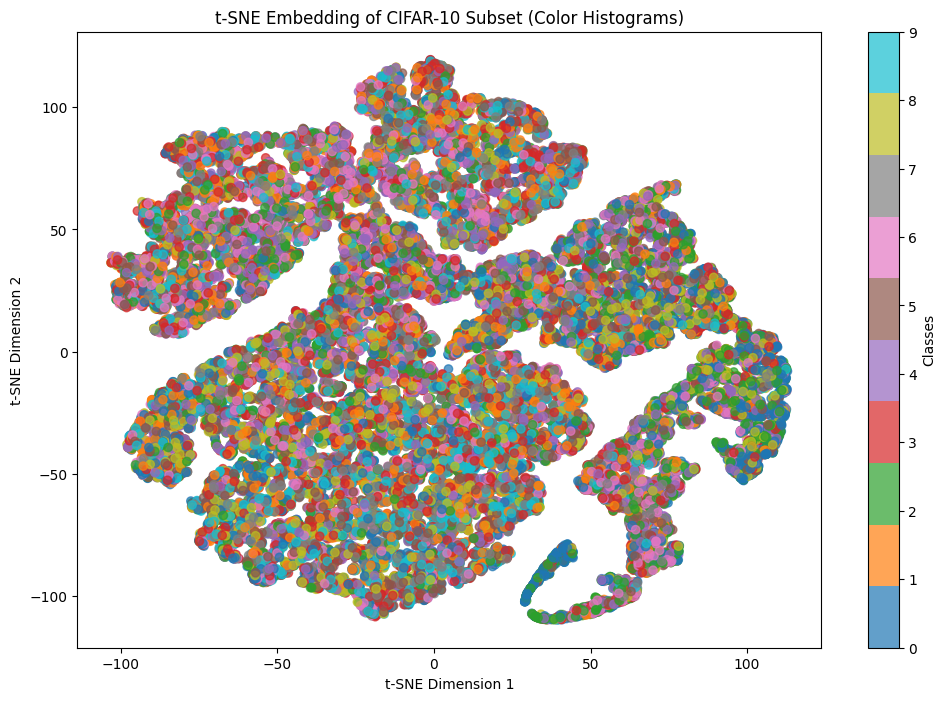

In [20]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_gen_tsne[:, 0], x_gen_tsne[:, 1], c = y_train.flatten(), cmap="tab10", alpha = 0.7)
plt.colorbar(scatter, ticks=range(len(labels)), label='Classes')
plt.title("t-SNE Embedding of CIFAR-10 Subset (Color Histograms)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

In [21]:
def compute_each_component(images, bins = 16, r = True, g = False, b = False):
    """
    Compute the components to apply the TSNE, including the histograms.
    """

    hist_ = np.zeros((images.shape[0], 4))
    for count, img in enumerate(images):

        if r == True and g == False and b == False:
            histogram = np.histogram(img[:, :, 0], bins = bins, range = (0, 1), density = True)[0]
        elif r == False and g == True and b == False:
            histogram = np.histogram(img[:, :, 1], bins = bins, range = (0, 1), density = True)[0]
        elif r == False and g == False and b == True:
            histogram = np.histogram(img[:, :, 2], bins = bins, range = (0, 1), density = True)[0]
        else:
            raise Exception(f"There are an invalid value here!")
        hist_[count, 0] = np.std(histogram)
        hist_[count, 1] = np.mean(histogram)
        hist_[count, 2] = skew(histogram.flatten())
        hist_[count, 3] = kurtosis(histogram.flatten())

    return hist_

In [22]:
hist_ = compute_each_component(x_train_norm)

In [23]:
%%time

x_each_tsne = tsne.fit_transform(hist_)

CPU times: user 12min 9s, sys: 7.6 s, total: 12min 17s
Wall time: 2min 43s


In [24]:
print(f"The array returned has the shape : {x_each_tsne.shape}")

The array returned has the shape : (50000, 2)


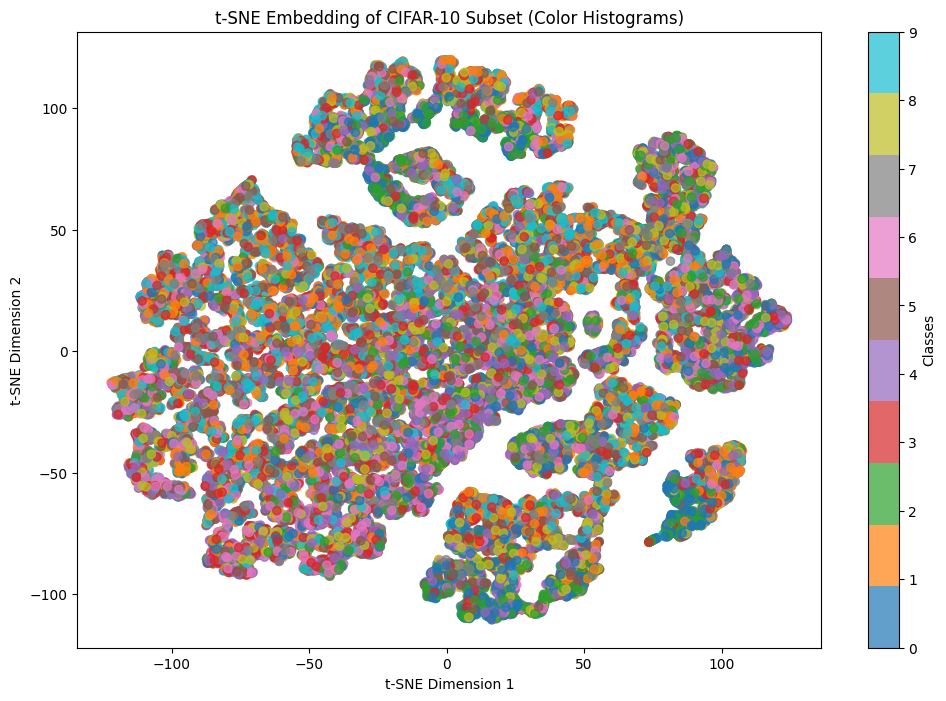

In [25]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_each_tsne[:, 0], x_each_tsne[:, 1], c = y_train.flatten(), cmap="tab10", alpha = 0.7)
plt.colorbar(scatter, ticks=range(len(labels)), label='Classes')
plt.title("t-SNE Embedding of CIFAR-10 Subset (Color Histograms)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

#### Applying PCA in the data :

In [26]:
%%time
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
#x_pca = pca.fit_transform(arr_)
x_pca = pca.fit_transform(hist_)

CPU times: user 4.71 ms, sys: 1.98 ms, total: 6.68 ms
Wall time: 16.2 ms


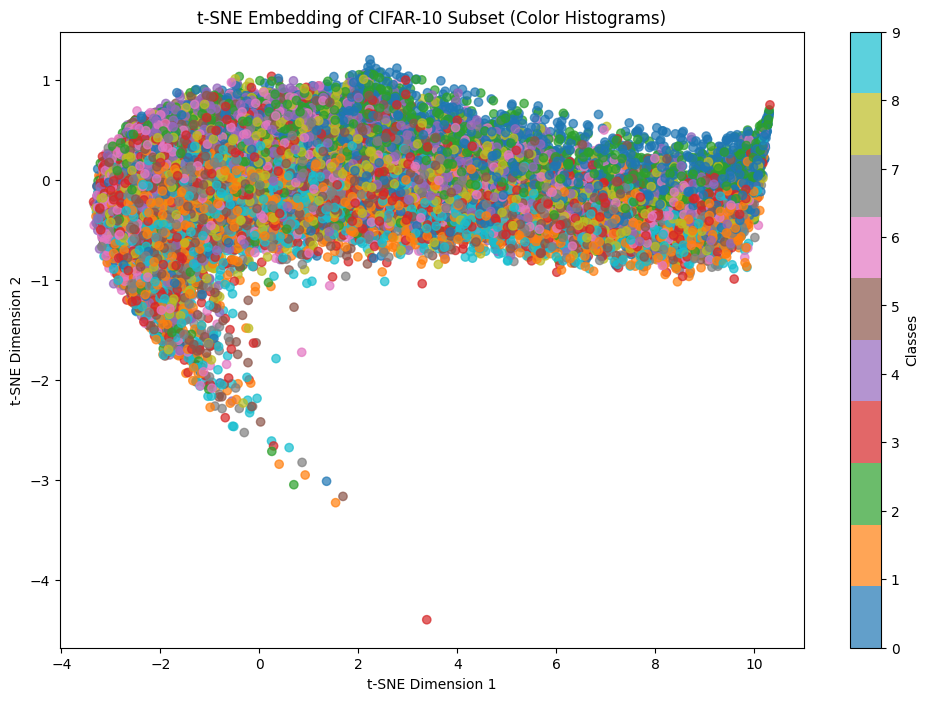

In [27]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c = y_train.flatten(), cmap="tab10", alpha=0.7)
plt.colorbar(scatter, ticks=range(len(labels)), label='Classes')
plt.title("t-SNE Embedding of CIFAR-10 Subset (Color Histograms)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

#### Here we have 4 kind of possible data. The all training data, the t-SNE data and PCA data, and we'll choose 1 to feed the CNN.

In [28]:
print(f"There are 4 kind of data to feed cnn, all : {X_train.shape}, tsne_gen {x_gen_tsne.shape}, \n tsne_hist{x_each_tsne.shape}, pca_gen {x_pca.shape} ")

There are 4 kind of data to feed cnn, all : (50000, 32, 32, 3), tsne_gen (50000, 2), 
 tsne_hist(50000, 2), pca_gen (50000, 2) 


In [29]:
"""import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"The device is {device}.")

X_train_tensor = torch.tensor(X_train).float().to(device)
X_test_tensor = torch.tensor(X_test).float().to(device)
y_train_tensor = torch.tensor(y_train).float().to(device)
y_test_tensor = torch.tensor(y_test).float().to(device)

y_train_tensor.shape"""

'import torch\n\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\n\nprint(f"The device is {device}.")\n\nX_train_tensor = torch.tensor(X_train).float().to(device)\nX_test_tensor = torch.tensor(X_test).float().to(device)\ny_train_tensor = torch.tensor(y_train).float().to(device)\ny_test_tensor = torch.tensor(y_test).float().to(device)'

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

# Check device (CUDA or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"The device is {device}.")

# Convert the input data to tensors and move them to the appropriate device
X_train_tensor = torch.tensor(X_train).permute(0, 3, 1, 2).float().to(device)  # Shape: [batch_size, 3, 32, 32]
X_test_tensor = torch.tensor(X_test).permute(0, 3, 1, 2).float().to(device)    # Shape: [batch_size, 3, 32, 32]
# Ensure the data tensors have the correct shape
y_train_tensor = torch.tensor(y_train.reshape(-1, )).to(device)  # Ensure y_train is 1D (class indices)
y_test_tensor = torch.tensor(y_test.reshape(-1, )).to(device)    # Ensure y_test is 1D
# Check if the labels are 1D tensors
#assert y_train_tensor.dim() == 1, f"y_train_tensor should be 1D but got {y_train_tensor.dim()}D"
#assert y_test_tensor.dim() == 1, f"y_test_tensor should be 1D but got {y_test_tensor.dim()}D"


# Create DataLoader for training and validation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64)
y_train_tensor.shape

The device is cuda.


torch.Size([50000])

In [33]:
# CNN Model definition
class Cifar10CnnModel(nn.Module):
    def __init__(self):
        super(Cifar10CnnModel, self).__init__()
        self.network = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # output: 64 x 16 x 16
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # output: 128 x 8 x 8
            nn.BatchNorm2d(128),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # output: 256 x 4 x 4
            nn.BatchNorm2d(256),

            nn.Flatten(),
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10)  # Output layer for CIFAR-10 classification
        )
    
    def forward(self, xb):
        return self.network(xb)

    def training_step(self, batch):
        images, labels = batch
        out = self(images)  # Forward pass
        loss = F.cross_entropy(out, labels)  # Compute loss
        accuracy = (out.argmax(dim=1) == labels).float().mean()  # Calculate accuracy
        return loss, accuracy

    @torch.no_grad()
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        accuracy = (out.argmax(dim=1) == labels).float().mean()
        return {'val_loss': loss, 'Accuracy': accuracy}

    @torch.no_grad()
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        batch_accuracies = [x['Accuracy'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        epoch_accuracy = torch.stack(batch_accuracies).mean()
        return {'val_loss': epoch_loss.item(), 'Accuracy': epoch_accuracy.item()}

    def epoch_end(self, epoch, result):
        print(f"Epoch [{epoch+1}], "
              f"Train Loss: {result['train_loss']:.4f}, "
              f"Train Accuracy: {result['train_accuracy']:.4f}, "
              f"Validation Loss: {result['val_loss']:.4f}, "
              f"Validation Accuracy: {result['Accuracy']:.4f}")



raining Epoch 1/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [00:08<00:00, 90.79it/s]

Epoch [1], Train Loss: 1.2117, Train Accuracy: 0.5630, Validation Loss: 0.9015, Validation Accuracy: 68.9500



raining Epoch 2/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [00:08<00:00, 90.44it/s]

Epoch [2], Train Loss: 0.7497, Train Accuracy: 0.7402, Validation Loss: 0.7397, Validation Accuracy: 74.9900



raining Epoch 3/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [00:08<00:00, 89.94it/s]

Epoch [3], Train Loss: 0.5969, Train Accuracy: 0.7929, Validation Loss: 0.6453, Validation Accuracy: 78.3800



raining Epoch 4/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [00:08<00:00, 89.32it/s]

Epoch [4], Train Loss: 0.5078, Train Accuracy: 0.8248, Validation Loss: 0.5884, Validation Accuracy: 79.8500



raining Epoch 5/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [00:08<00:00, 88.87it/s]

Epoch [5], Train Loss: 0.4390, Train Accuracy: 0.8486, Validation Loss: 0.6045, Validation Accuracy: 79.7200



raining Epoch 6/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [00:08<00:00, 88.49it/s]

Epoch [6], Train Loss: 0.3845, Train Accuracy: 0.8669, Validation Loss: 0.5661, Validation Accuracy: 80.8300



raining Epoch 7/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [00:08<00:00, 88.03it/s]

Epoch [7], Train Loss: 0.3419, Train Accuracy: 0.8804, Validation Loss: 0.5704, Validation Accuracy: 81.0100



raining Epoch 8/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [00:08<00:00, 87.60it/s]

Epoch [8], Train Loss: 0.3015, Train Accuracy: 0.8962, Validation Loss: 0.5426, Validation Accuracy: 82.9200



raining Epoch 9/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [00:08<00:00, 87.28it/s]

Epoch [9], Train Loss: 0.2723, Train Accuracy: 0.9045, Validation Loss: 0.5734, Validation Accuracy: 81.4500



raining Epoch 10/10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 782/782 [00:08<00:00, 86.93it/s]

Epoch [10], Train Loss: 0.2454, Train Accuracy: 0.9145, Validation Loss: 0.5821, Validation Accuracy: 81.6800


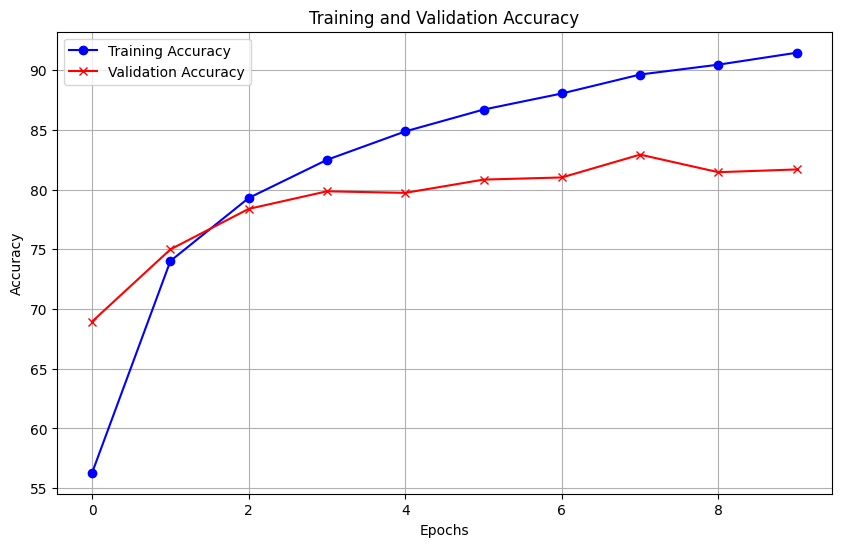

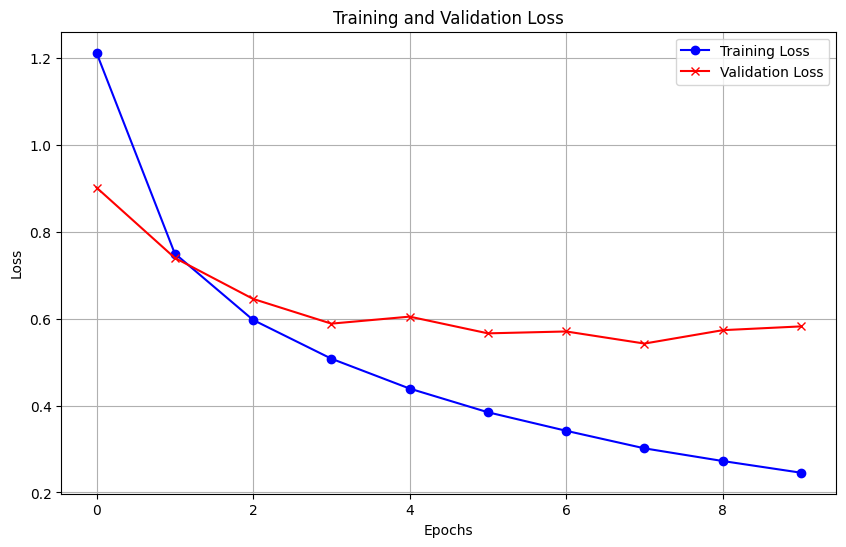

In [50]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm

# Assuming criterion is defined elsewhere
criterion = nn.CrossEntropyLoss()  # Example loss function, replace if needed

# Define a function to plot accuracy
def plot_accuracy(train_acc, val_acc, epochs):
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), train_acc, label='Training Accuracy', color='blue', marker='o')
    plt.plot(range(epochs), val_acc, label='Validation Accuracy', color='red', marker='x')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define a function to plot loss
def plot_loss(train_loss, val_loss, epochs):
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), train_loss, label='Training Loss', color='blue', marker='o')
    plt.plot(range(epochs), val_loss, label='Validation Loss', color='red', marker='x')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the evaluate function
def evaluate(model, val_loader, device):
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # No need to track gradients during evaluation
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)  # Assuming you have defined 'criterion' for loss function

            # Update loss and accuracy
            val_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(targets).sum().item()
            total += targets.size(0)

    # Compute average loss and accuracy
    avg_val_loss = val_loss / total
    val_accuracy = correct / total * 100

    return {"val_loss": avg_val_loss, "Accuracy": val_accuracy}

# Modify the fit function to track accuracy and loss
def fit(device, model, train_loader, val_loader, epochs=10, learning_rate=0.001):
    best_valid = None
    history = []
    train_acc_list = []  # List to store training accuracies
    val_acc_list = []    # List to store validation accuracies
    train_loss_list = []  # List to store training losses
    val_loss_list = []    # List to store validation losses
    optimizer = torch.optim.Adam(model.parameters(), learning_rate, weight_decay=0.0005)
    
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        train_accuracy = []
        for batch in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{epochs}"):
            loss, accu = model.training_step(batch)  # Ensure your model returns loss and accuracy
            #print(f"Loss: {loss.item()}, Accuracy: {accu.item()}")  # Debugging output
            train_losses.append(loss)
            train_accuracy.append(accu)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Compute average accuracy and loss for training
        train_acc = torch.stack(train_accuracy).mean().item()
        train_loss = torch.stack(train_losses).mean().item()
        train_acc_list.append(100*train_acc)
        train_loss_list.append(train_loss)
        
        # Validation phase
        result = evaluate(model, val_loader, device)
        result['train_loss'] = train_loss
        result['train_accuracy'] = train_acc
        model.epoch_end(epoch, result)
        
        # Compute average accuracy for validation
        val_acc = result['Accuracy']
        val_loss = result['val_loss']
        val_acc_list.append(val_acc)
        val_loss_list.append(val_loss)
        
        if best_valid is None or best_valid < result['Accuracy']:
            best_valid = result['Accuracy']
            torch.save(model.state_dict(), 'cifar10-cnn.pth')
        
        history.append(result)
    
    # Plot the training and validation accuracy and loss
    plot_accuracy(train_acc_list, val_acc_list, epochs)
    plot_loss(train_loss_list, val_loss_list, epochs)
    
    return history

# Assuming Cifar10CnnModel and the data loaders train_loader and val_loader are correctly defined elsewhere
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Cifar10CnnModel().to(device)

# Start training
history = fit(device, model, train_loader, test_loader, epochs=10, learning_rate=0.001)


In [58]:
def test(model, test_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in test_loader]
    return model.validation_epoch_end(outputs)

# Test the model after training
test_result = test(model, test_loader)
print(f"Test Accuracy: {test_result['Accuracy']}")

Test Accuracy: 0.8167794942855835


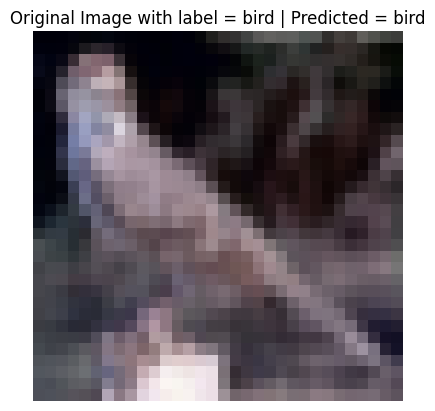

True label: 2, Predicted label: 2


2

In [60]:
def pred_img(img, true_label, model, device, labels):
    # Ensure the image is in the correct format
    img = torch.tensor(img).float()  # Convert to tensor
    img = img.permute(2, 0, 1)  # Change to shape (C, H, W)
    img = img.unsqueeze(0).to(device)  # Add batch dimension and move to device
    
    # Set the model to evaluation mode
    model.eval()
    
    # Make prediction
    with torch.no_grad():
        output = model(img)
        predicted_label = output.argmax(dim=1).item()  # Get the predicted class
    
    # Normalize the image to be in the range [0, 1] if it's not already
    img = img.squeeze(0).cpu().numpy().transpose(1, 2, 0)  # Convert back to (H, W, C)
    img = np.clip(img, 0, 255) / 255.0  # Normalize if it's in [0, 255] range (to [0, 1])
    
    # Plot the image
    plt.axis("off")
    plt.title(f"Original Image with label = {labels[true_label]} | Predicted = {labels[predicted_label]}")
    plt.imshow(img)  # Now imshow can handle the image correctly
    plt.show()
    
    print(f"True label: {true_label}, Predicted label: {predicted_label}")
    return predicted_label

# Assuming the following variables are defined:
# - X_test (the test images in the form of numpy arrays)
# - y_test (the true labels)
# - model (the trained model)
# - device (either "cuda" or "cpu")
rand_number = int(np.random.randint(low=0, high=10001))  # Get a random index
true_label = int(y_test[rand_number].item())  # Get the true label from y_test
pred_img(X_test[rand_number, :], true_label, model, device, labels)  # Show and predict the image


In [80]:
x_train_norm.shape

(50000, 32, 32, 3)

In [81]:
print(model)

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=2, stride=2, padding=